<a href="https://colab.research.google.com/github/Pimwipha302004/Pimwipha-229352-StatisticalLeaening/blob/main/229351_LAB10_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 8

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด
3. ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [ ]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-17 13:18:40--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.04s   

2025-09-17 13:18:40 (3.79 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [ ]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

In [ ]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.tail()

/tmp/ipython-input-4152100627.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


,MaxTemp
Date,
2019-07-27,26.2
2019-07-28,34.2
2019-07-29,34.4
2019-07-30,33.5
2019-07-31,30.7


ข้อมูลที่ได้เป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วย method `resample`

In [ ]:
data_monthly = data['MaxTemp'].resample("M").mean()

data_monthly.head()

/tmp/ipython-input-3219926365.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['MaxTemp'].resample("M").mean()


,MaxTemp
Date,
1998-01-31,31.687097
1998-02-28,33.685714
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848387


In [ ]:
train = data_monthly.iloc[:-24]  # ข้อมูลก่อน 24 เดือนสุดท้าย
test  = data_monthly.iloc[-24:]  # 24 เดือนสุดท้าย

print("\nขนาดชุดข้อมูล:")
print("Train set:", train.shape)
print("Test set:", test.shape)

def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))


ขนาดชุดข้อมูล:
Train set: (235,)
Test set: (24,)


In [ ]:
results = {}

# 1) Additive, non-damped
model1 = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fit1 = model1.fit(optimized=True)
yhat1 = fit1.predict(start=test.index[0], end=test.index[-1])
results['Additive, non-damped'] = rmse(test, yhat1)

# 2) Additive, damped
model2 = ExponentialSmoothing(train, trend='add', damped_trend=True, seasonal='add', seasonal_periods=12)
fit2 = model2.fit(optimized=True)
yhat2 = fit2.predict(start=test.index[0], end=test.index[-1])
results['Additive, damped'] = rmse(test, yhat2)

# 3) Multiplicative, non-damped
model3 = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12)
fit3 = model3.fit(optimized=True)
yhat3 = fit3.predict(start=test.index[0], end=test.index[-1])
results['Multiplicative, non-damped'] = rmse(test, yhat3)

# 4) Multiplicative, damped
model4 = ExponentialSmoothing(train, trend='add', damped_trend=True, seasonal='mul', seasonal_periods=12)
fit4 = model4.fit(optimized=True)
yhat4 = fit4.predict(start=test.index[0], end=test.index[-1])
results['Multiplicative, damped'] = rmse(test, yhat4)

# ================== แสดงค่า RMSE ==================
print("\nค่า RMSE ของแต่ละโมเดล:")
for name, error in results.items():
    print(f"{name}: {error:.4f}")

# ================== เลือกโมเดลที่ RMSE ต่ำสุด ==================
best_model_name = min(results, key=results.get)
print("\nโมเดลที่ดีที่สุด:", best_model_name)

if best_model_name == 'Additive, non-damped':
    best_yhat = yhat1
elif best_model_name == 'Additive, damped':
    best_yhat = yhat2
elif best_model_name == 'Multiplicative, non-damped':
    best_yhat = yhat3
else:
    best_yhat = yhat4




ค่า RMSE ของแต่ละโมเดล:
Additive, non-damped: 1.1670
Additive, damped: 1.1135
Multiplicative, non-damped: 1.1640
Multiplicative, damped: 1.1062

โมเดลที่ดีที่สุด: Multiplicative, damped


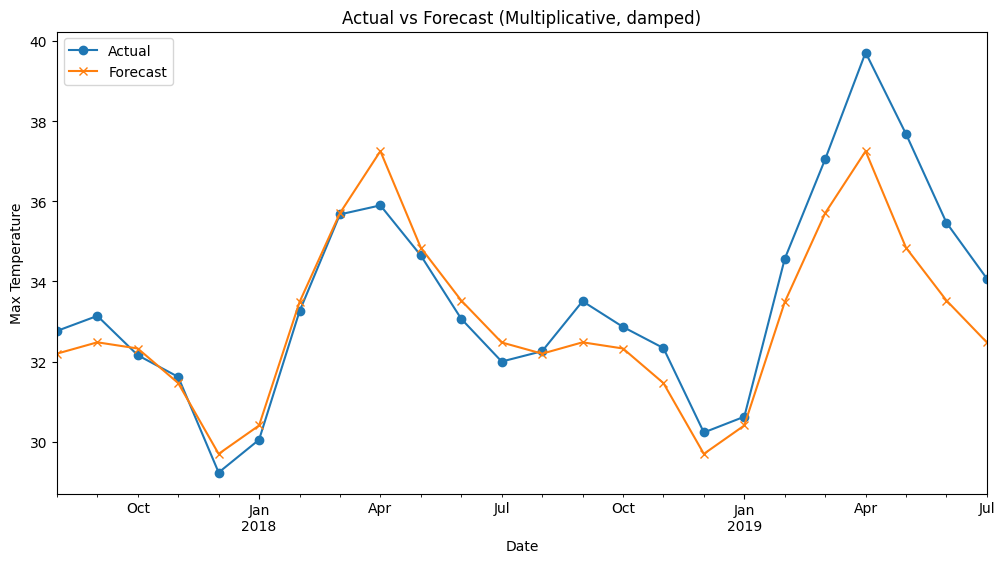

In [ ]:
plt.figure(figsize=(12,6))
test.plot(label='Actual', marker='o')
best_yhat.plot(label='Forecast', marker='x')
plt.title(f'Actual vs Forecast ({best_model_name})')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.legend()
plt.show()